## Visualize outputs


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
#csfont = {'fontname':'Times New Roman'}
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.matplotlib.rcParams.update({'font.size': 20})

import matplotlib.colors
import cv2

In [3]:
def visualize(idx, **images):
    """Plot images in one row."""
    
    #norm=plt.Normalize(0,4) # 5 classes including BG
    #map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])
    
    n = len(images)
    plt.figure(figsize=(18, 16))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
        
    plt.savefig("../outs/{}.png".format(idx), facecolor="white", bbox_inches = 'tight', dpi=600)
    #plt.show()
    
    
def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    f = dir.split('/')[-1].split('_')[-1]
    #print (dir, f)
    dirs= os.listdir(dir)
    for img in dirs:

        path = os.path.join(dir, img)
        #print(path)
        images.append(path)
    return images

def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
os.makedirs('../outs',exist_ok=True)

In [5]:
# Path to model
algo1 = "acgpn_5000"
algo2 = "resunet_g1"

# path to person
person_path = "../../datasets/acgpn_data/try_on_testing/test_img"
# path to cloth
cloth_path = "../../datasets/acgpn_data/try_on_testing/test_color"

mode = "all"

algo1_path = "../tryons_random/" + algo1 + "/" + mode
algo2_path = "../tryons_random/" + algo2 + "/" + mode

In [6]:
person_path_files = sorted(make_dataset(person_path))
cloth_path_files = sorted(make_dataset(cloth_path))[::-1]
algo1_path_files = sorted(make_dataset(algo1_path))
algo2_path_files = sorted(make_dataset(algo2_path))

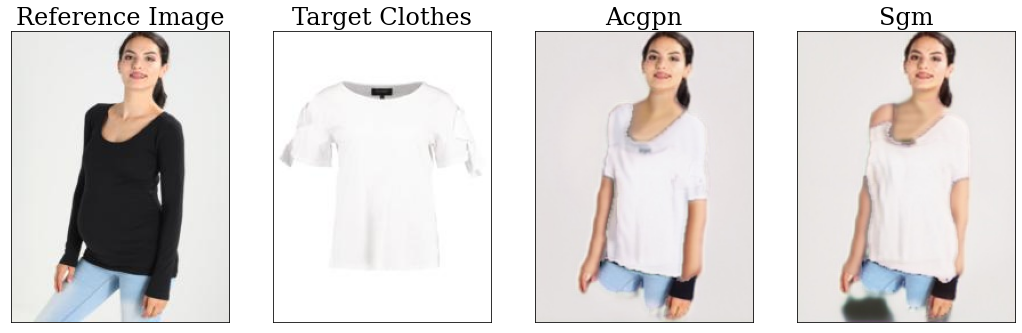

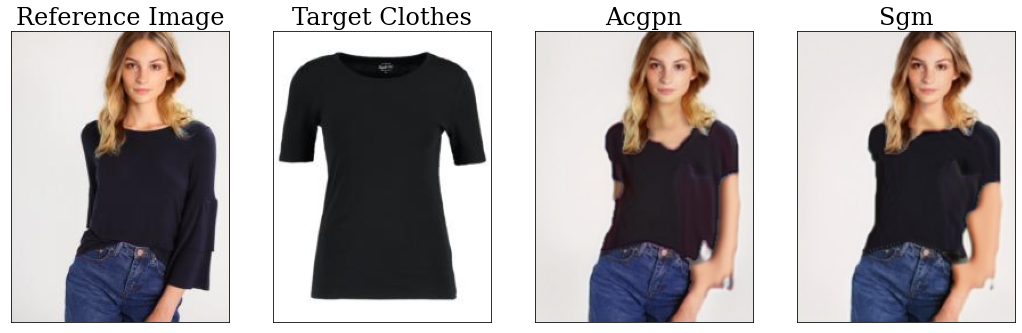

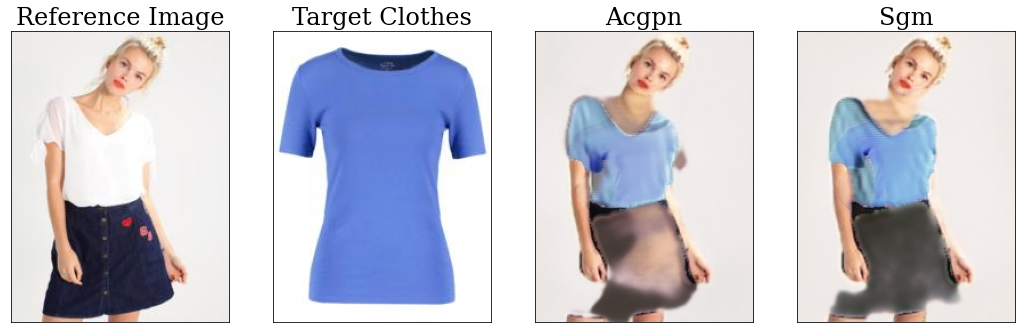

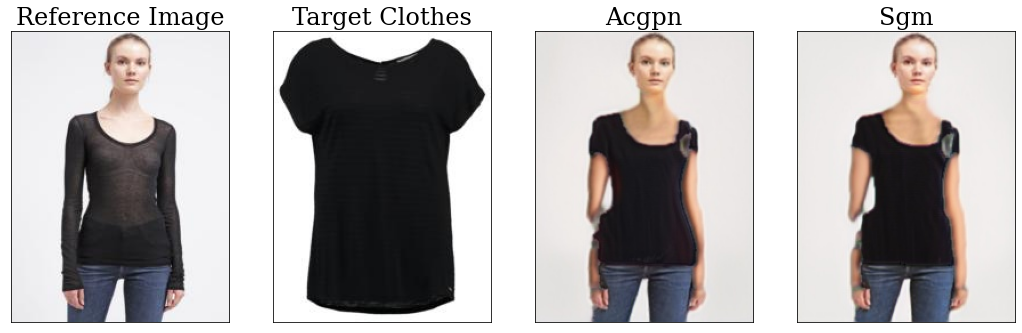

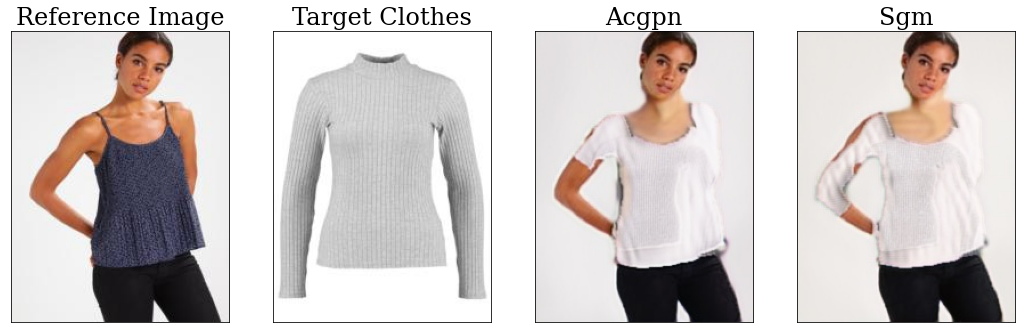

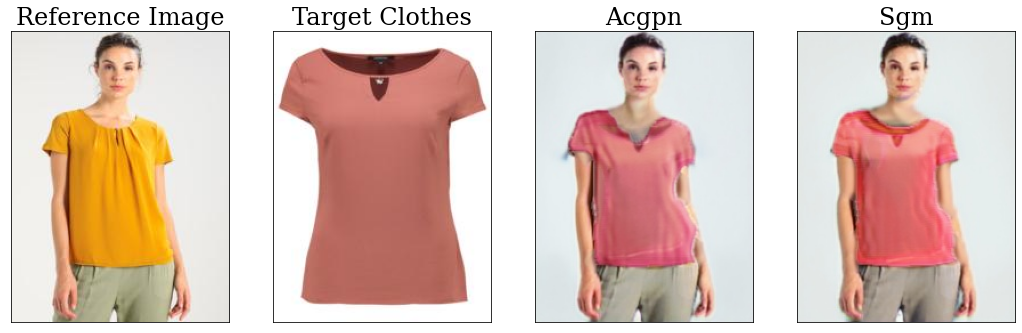

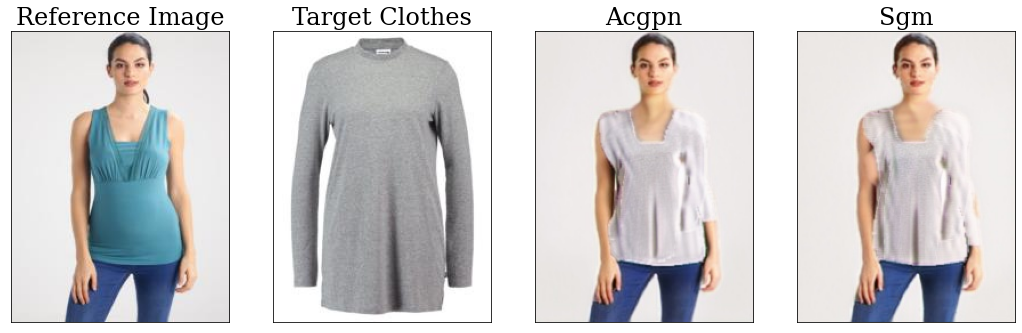

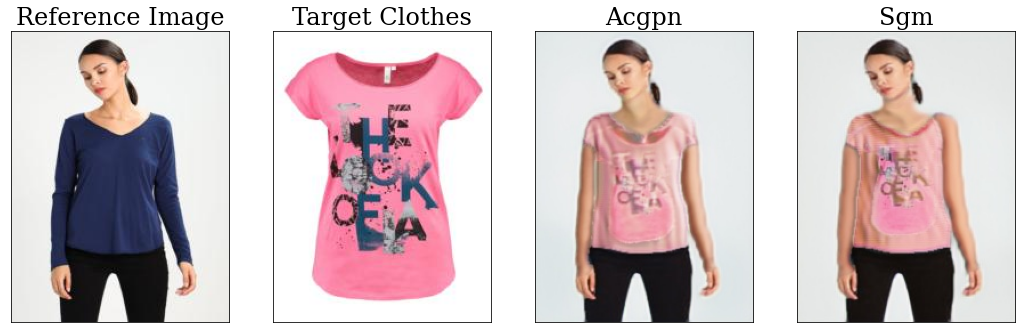

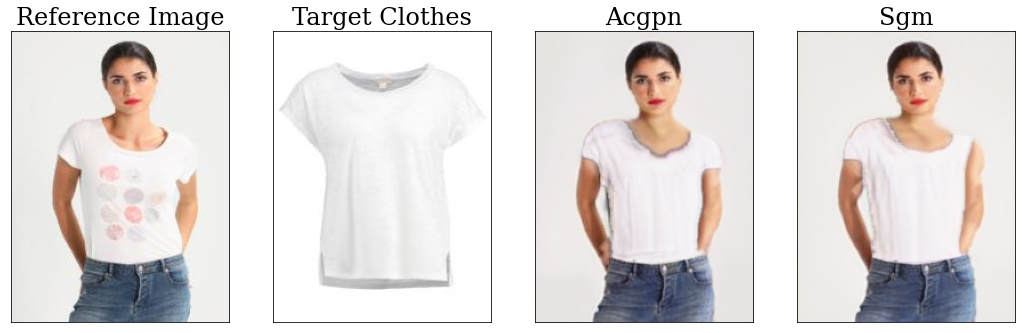

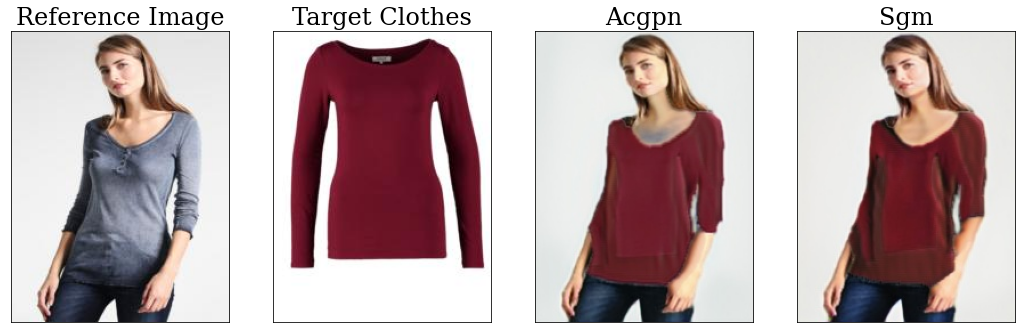

In [7]:
slc = 10
i = 0
for p, c, a1, a2 in zip(person_path_files[:slc], 
                     cloth_path_files[:slc], 
                     algo1_path_files[:slc], 
                     algo2_path_files[:slc]):
    
    visualize(i, Reference_Image=read_image(p), 
              Target_Clothes = read_image(c), 
              ACGPN = read_image(a1), 
              ResUnet_SGM = read_image(a2))
    i+=1